# 02 - Danish Fungi - High-level Exploration of the Training Dataset

In [1]:
import os

os.chdir('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.core import data
from src.utils import visualization as viz


DATA_DIR = 'data/danish_fungi_dataset/'
TRAIN_SET_DIR = 'train'

In [3]:
# load metadata
train_df = pd.read_csv(DATA_DIR + 'DF20-train_metadata_PROD.csv')
train_mini_df = pd.read_csv(DATA_DIR + 'DF20M-train_metadata_PROD.csv')
valid_df = pd.read_csv(DATA_DIR + 'DF20-public_test_metadata_PROD.csv')
valid_mini_df = pd.read_csv(DATA_DIR + 'DF20M-public_test_metadata_PROD.csv')

# assert 'valid' in train_df
# assert 'valid' in train_mini_df

print(f'Train set length: {len(train_df):,d}')
print(f'Train set mini length: {len(train_mini_df):,d}')
print(f'Test set length: {len(valid_df):,d}')
print(f'Test set mini length: {len(valid_mini_df):,d}')

print('No classes in train set:', len(train_df['scientificName'].unique()))
print('No classes in train set mini:', len(train_mini_df['scientificName'].unique()))
print('No classes in test set:', len(valid_df['scientificName'].unique()))
print('No classes in test set mini:', len(valid_mini_df['scientificName'].unique()))

Train set length: 266,344
Train set mini length: 32,753
Test set length: 29,594
Test set mini length: 3,640
No classes in train set: 1604
No classes in train set mini: 182
No classes in test set: 1604
No classes in test set mini: 182


## Explore Attributes

In [4]:
train_df.isnull().sum() / len(train_df)

gbifID                  0.000000
eventDate               0.000060
year                    0.000060
month                   0.000060
day                     0.000060
countryCode             0.000000
locality                0.000267
taxonID                 0.000000
scientificName          0.000000
kingdom                 0.000000
phylum                  0.000000
class                   0.000109
order                   0.000589
family                  0.008895
genus                   0.000000
specificEpithet         0.000000
infraspecificEpithet    1.000000
taxonRank               0.000000
species                 0.000109
level0Gid               0.004025
level0Name              0.004025
level1Gid               0.004025
level1Name              0.004025
level2Gid               0.004107
level2Name              0.004107
ImageUniqueID           0.000000
Substrate               0.005136
rightsHolder            0.000000
Latitude                0.000000
Longitude               0.000000
CoorUncert

In [5]:
train_df.iloc[0]

gbifID                                                         2238546328
eventDate                                             2018-04-16T00:00:00
year                                                                 2018
month                                                                   4
day                                                                    16
countryCode                                                            DK
locality                                                 Ulvedal Plantage
taxonID                                                             30872
scientificName                               Ramalina farinacea (L.) Ach.
kingdom                                                             Fungi
phylum                                                         Ascomycota
class                                                     Lecanoromycetes
order                                                         Lecanorales
family                                

In [6]:
train_df['eventDate']

0         2018-04-16T00:00:00
1         2020-01-03T00:00:00
2         2017-08-22T00:00:00
3         2019-10-26T00:00:00
4         2016-08-21T00:00:00
                 ...         
266339    2018-10-24T00:00:00
266340    2017-04-13T00:00:00
266341    2020-09-05T00:00:00
266342    2009-10-14T00:00:00
266343    2018-05-23T00:00:00
Name: eventDate, Length: 266344, dtype: object

### Dependent Attributes - Unique Counts

In [7]:
out = {}
for col in ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'scientificName']:
    out[col] = train_df[col].drop_duplicates().shape[0]
out

{'kingdom': 3,
 'phylum': 5,
 'class': 23,
 'order': 66,
 'family': 190,
 'genus': 566,
 'species': 1578,
 'scientificName': 1604}

In [8]:
train_df['kingdom'].value_counts()

Fungi        263285
Protozoa       2970
Chromista        89
Name: kingdom, dtype: int64

In [9]:
train_df['scientificName'].value_counts()

Trametes versicolor (L.) Lloyd                 1722
Fomitopsis pinicola (Sw.) P.Karst.             1569
Hypholoma fasciculare (Huds.) P.Kumm., 1871    1472
Pluteus cervinus (Schaeff.) P.Kumm.            1228
Fomes fomentarius (L.) Fr., 1849               1185
                                               ... 
Cuphophyllus fuscescens (Bres.) Bon              28
Hygrocybe intermedia (Pass.) Fayod               28
Gymnopus acervatus (Fr.) Murrill, 1916           28
Lycoperdon mammiforme Pers.                      28
Clavaria zollingeri Lév.                         28
Name: scientificName, Length: 1604, dtype: int64

### Independent Attributes - Unique Counts

In [10]:
out = {}
for col in ['year', 'month', 'day', 'Habitat', 'Substrate',
            'countryCode', 'level0Name', 'level0Gid', 'level1Name', 'level1Gid', 'level2Name', 'level2Gid', 'locality']:
    out[col] = train_df[col].drop_duplicates().shape[0]
out

{'year': 51,
 'month': 13,
 'day': 32,
 'Habitat': 32,
 'Substrate': 32,
 'countryCode': 30,
 'level0Name': 32,
 'level0Gid': 32,
 'level1Name': 112,
 'level1Gid': 112,
 'level2Name': 311,
 'level2Gid': 311,
 'locality': 8862}

In [11]:
train_df.groupby(['countryCode', 'level0Name']).size()

countryCode  level0Name            
AL           Albania                        1
AT           Austria                        2
AU           Australia                     13
CA           Canada                         4
CR           Costa Rica                     1
CZ           Czech Republic               123
DE           Germany                      130
DK           Denmark                   263023
             Gabon                          7
             Germany                       10
ES           Spain                        144
FI           Finland                       26
FO           Faroe Islands                  3
FR           France                        30
GA           Gabon                          2
GB           United Kingdom               101
GL           Greenland                     14
GR           Greece                       142
HR           Croatia                        6
HU           Hungary                        7
IS           Iceland                       3

In [12]:
train_df['locality'].value_counts()

Store Hareskov           2772
Hegedal                  2647
Rantzausminde            2352
Hobro                    2240
Vestskoven, København    1986
                         ... 
Øsløs                       1
Ibis Leiden Centre          1
Sejlgård                    1
Hundemose Skov              1
Bromme                      1
Name: locality, Length: 8861, dtype: int64

In [24]:
counts = train_df['Habitat'].value_counts()
(pd.concat([counts, counts / counts.sum()], axis=1) * [1, 100]).round(1)

,Habitat,Habitat
Deciduous woodland,58393,22.0
Mixed woodland (with coniferous and deciduous trees),44779,16.9
Unmanaged deciduous woodland,31267,11.8
coniferous woodland/plantation,27724,10.4
park/churchyard,17474,6.6
natural grassland,16843,6.3
garden,7551,2.8
Unmanaged coniferous woodland,7108,2.7
roadside,6562,2.5
Thorny scrubland,6290,2.4


In [25]:
counts = train_df['Substrate'].value_counts()
(pd.concat([counts, counts / counts.sum()], axis=1) * [1, 100]).round(1)

,Substrate,Substrate
soil,121280,45.8
dead wood (including bark),69316,26.2
wood,20694,7.8
bark of living trees,10213,3.9
leaf or needle litter,10089,3.8
bark,4911,1.9
wood and roots of living trees,3773,1.4
mosses,3659,1.4
"stems of herbs, grass etc",3053,1.2
wood chips or mulch,2963,1.1


In [26]:
counts.sum()

264976

<AxesSubplot:>

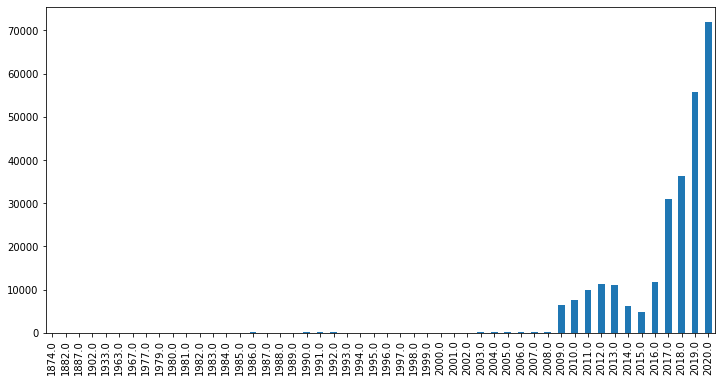

In [15]:
train_df['year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))

In [16]:
train_df['year'].value_counts().loc[[2020, 2019, 2018, 2017]].sum()

195114

In [17]:
train_df['year'].value_counts().loc[[2020, 2019, 2018, 2017]].sum() / len(train_df)

0.7325639023218093

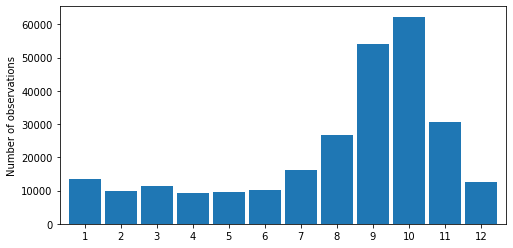

In [18]:
fig, ax = viz.create_fig(rowsize=4, colsize=8)
ax = train_df['month'].dropna().astype(int).value_counts().sort_index().plot(kind='bar', ax=ax, width=0.9)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.set(ylabel='Number of observations')
# title='Monthly distribution of observations in DF20', 
plt.show()
# fig.savefig('figures/df20_monthly_distribution.png', bbox_inches='tight')

<AxesSubplot:>

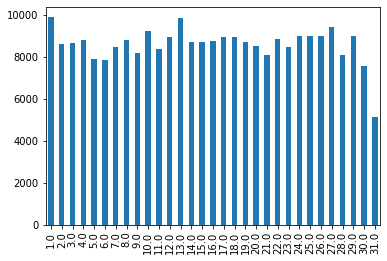

In [19]:
train_df['day'].value_counts().sort_index().plot(kind='bar')

In [20]:
# !pip install geopandas
import geopandas
from shapely.geometry import Point


def plot_gps(df, *, ax=None, figsize=None, alpha=0.2):
    assert 'Longitude' in df
    assert 'Latitude' in df

    # create geo dataframes
    world_gdf = geopandas.read_file(
        geopandas.datasets.get_path('naturalearth_lowres'))
    gdf = geopandas.GeoDataFrame(
        df, geometry=[Point(xy) for xy in zip(df['Longitude'], df['Latitude'])])

    # get colors
    cmap = plt.get_cmap('tab20c')
    blue = cmap.colors[0]
    gray = cmap.colors[-1]
    dark_gray = cmap.colors[-4]

    # plot
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    world_gdf.plot(color=gray, edgecolor=dark_gray, ax=ax)
    gdf.plot(marker='o', color=blue, markersize=12, alpha=alpha,
             edgecolor='black', linewidth=0.5, ax=ax)

    return ax

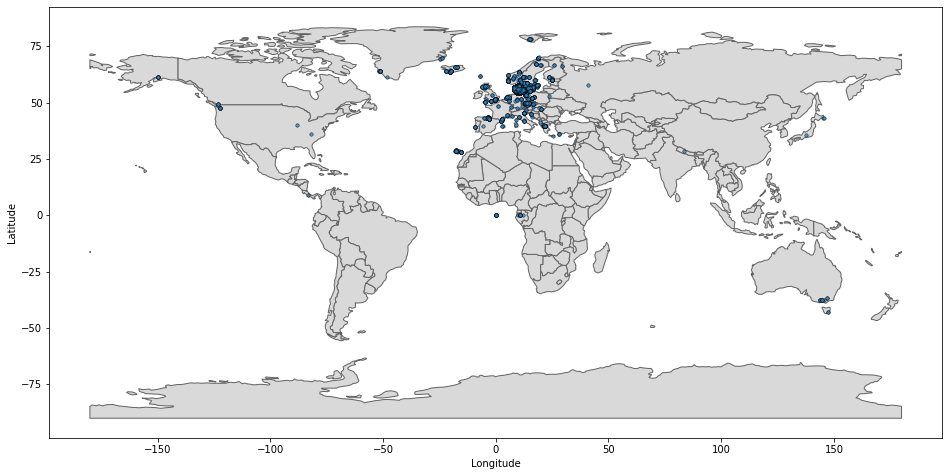

In [21]:
ax = plot_gps(train_df, figsize=(16, 12), alpha=0.8)
ax.set(ylabel='Latitude', xlabel='Longitude')
plt.show()

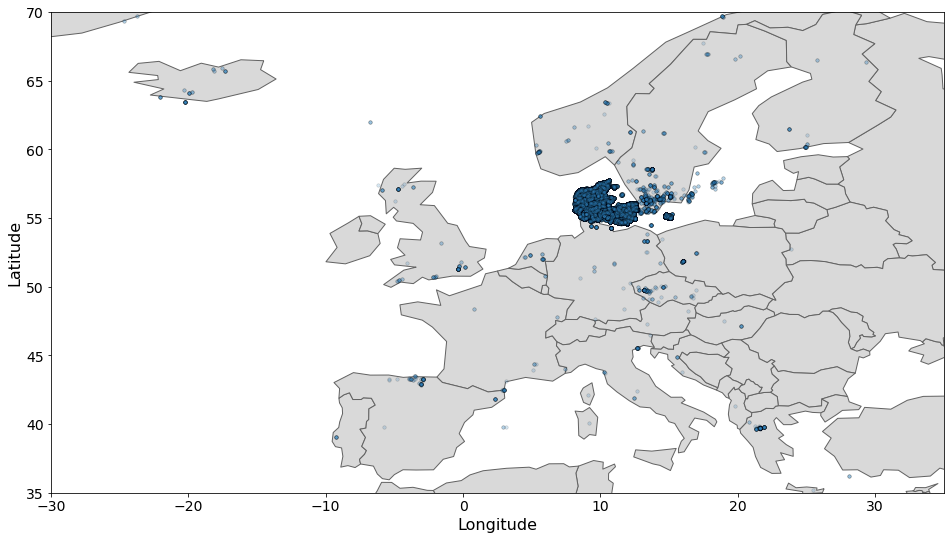

In [22]:
# plot geographical distribution
fig, ax = viz.create_fig(rowsize=12, colsize=16)
plot_gps(train_df, ax=ax)
ax.set(xlim=[-30, 35], ylim=[35, 70])  # title='Geographical distribution'
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
fig.savefig('figures/df20_geo_distribution.png', bbox_inches='tight')

/mnt/appl/software/SciPy-bundle/2020.11-foss-2020b/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


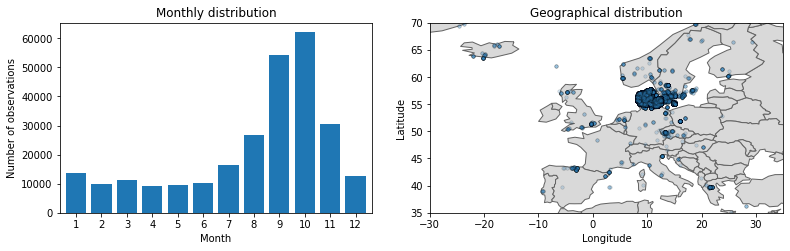

In [23]:
fig, (ax1, ax2) = viz.create_fig(ncols=2, rowsize=3.5, colsize=7,
                                 gridspec_kw={'width_ratios': [1, 1.5]})

# plot month distribution
train_df['month'].dropna().astype(int).value_counts().sort_index().plot(kind='bar', ax=ax1, width=0.8)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, ha='center')
ax1.set(ylabel='Number of observations', xlabel='Month', title='Monthly distribution')

# plot geographical distribution
plot_gps(train_df, ax=ax2)
ax2.set(xlim=[-30, 35], ylim=[35, 70], ylabel='Latitude', xlabel='Longitude',
        title='Geographical distribution')

# plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.show()
fig.savefig('figures/df20_monthly_geo_distribution.png', bbox_inches='tight')

### Image Overlaps between Train, Test, and Mini datasets

In [20]:
train_mini_df['image_path'].isin(train_df['image_path']).sum() / len(train_mini_df)

0.8993985283790797

In [21]:
valid_df['image_path'].isin(train_df['image_path']).sum() / len(valid_df)

0.0

In [22]:
valid_mini_df['image_path'].isin(train_mini_df['image_path']).sum() / len(valid_mini_df)

0.0

In [23]:
valid_mini_df['image_path'].isin(train_df['image_path']).sum() / len(valid_mini_df)

0.9043956043956044

In [24]:
valid_mini_df['image_path'].isin(valid_df['image_path']).sum() / len(valid_mini_df)

0.0956043956043956

### Class Distribution

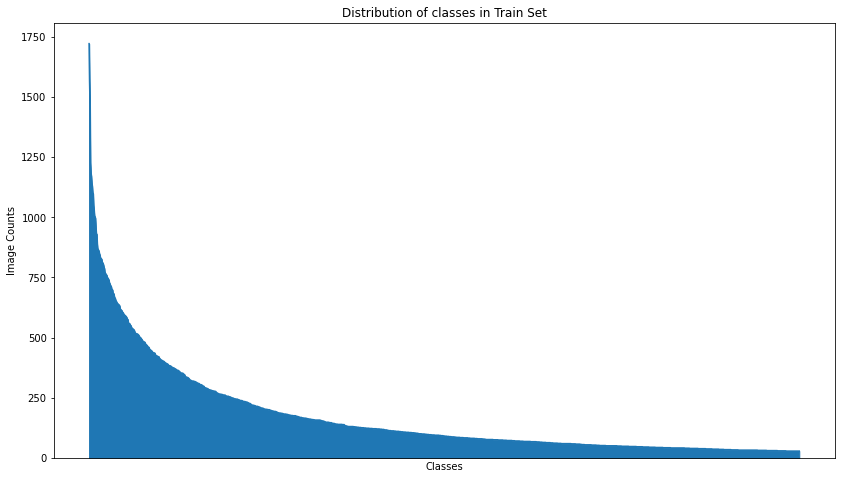

In [25]:
fig, ax = viz.create_fig(colsize=14, rowsize=8)
train_df['species'].value_counts().plot(kind='area', ax=ax)
ax.set(title='Distribution of classes in Train Set',
       xticks=[], xlabel='Classes', ylabel='Image Counts')
plt.show()

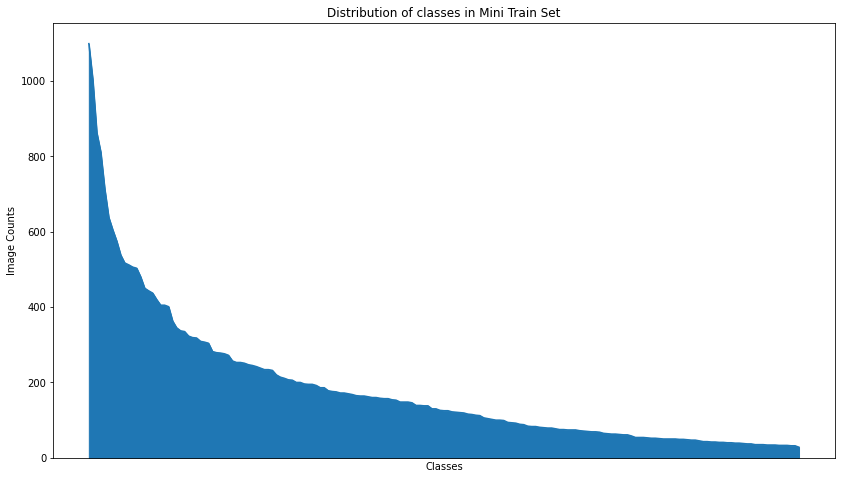

In [26]:
fig, ax = viz.create_fig(colsize=14, rowsize=8)
train_mini_df['species'].value_counts().plot(kind='area', ax=ax)
ax.set(title='Distribution of classes in Mini Train Set',
       xticks=[], xlabel='Classes', ylabel='Image Counts')
plt.show()

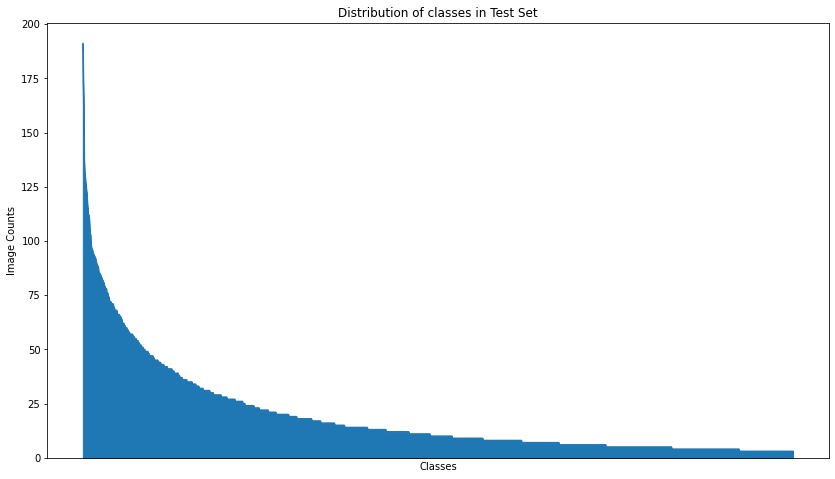

In [27]:
fig, ax = viz.create_fig(colsize=14, rowsize=8)
valid_df['species'].value_counts().plot(kind='area', ax=ax)
ax.set(title='Distribution of classes in Test Set',
       xticks=[], xlabel='Classes', ylabel='Image Counts')
plt.show()

## Show Image Examples

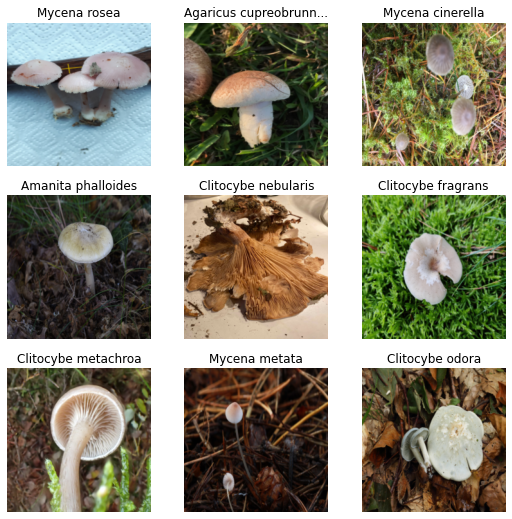

In [28]:
# create transforms
_, valid_tfms = data.get_transforms(size=224)

# create data loaders
validloader = data.get_dataloader(
    valid_mini_df, img_path_col='image_path', label_col='species',
    path=DATA_DIR + TRAIN_SET_DIR, transforms=valid_tfms,
    batch_size=32, shuffle=False, num_workers=0)

validloader.dataset.show_items()

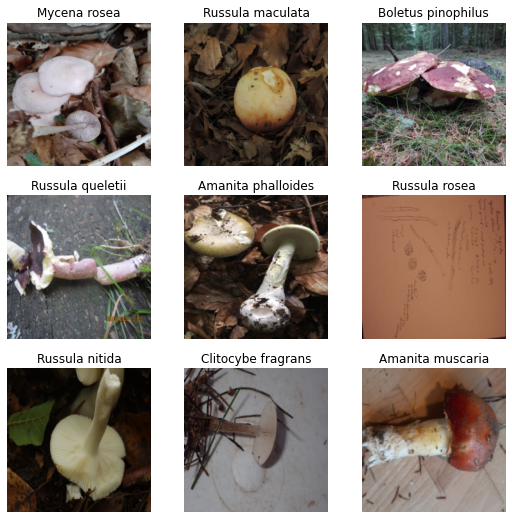

In [29]:
validloader.dataset.show_items()

In [30]:
train_df['Habitat']

0         Mixed woodland (with coniferous and deciduous ...
1                                        Deciduous woodland
2                                         natural grassland
3                                        gravel or clay pit
4         Mixed woodland (with coniferous and deciduous ...
                                ...                        
266339                                      park/churchyard
266340                       coniferous woodland/plantation
266341                                   gravel or clay pit
266342                         Unmanaged deciduous woodland
266343                                      park/churchyard
Name: Habitat, Length: 266344, dtype: object

In [31]:
train_df['Substrate']

0               bark of living trees
1         dead wood (including bark)
2                               soil
3                              stone
4                               soil
                     ...            
266339                          soil
266340    dead wood (including bark)
266341                          soil
266342                          wood
266343          bark of living trees
Name: Substrate, Length: 266344, dtype: object

## Explore Relationships between dependent and independent variables

In [32]:
dependent_vars = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'scientificName']
independent_vars = ['year', 'month', 'day', 'Habitat', 'Substrate',
                    'countryCode', 'level0Name', 'level1Name', 'level2Name', 'locality']

In [33]:
_train_df = train_df.copy()
_valid_df = valid_df.copy()
_train_df['observation_id'] = _train_df['ImageUniqueID'].str.split('-').str[0]
_valid_df['observation_id'] = _valid_df['ImageUniqueID'].str.split('-').str[0]

_train_df = _train_df.drop_duplicates('observation_id')
_train_df = _train_df[~_train_df['observation_id'].isin(_valid_df['observation_id'])]
_valid_df = _valid_df.drop_duplicates('observation_id')
# valid_df = valid_df[~valid_df['observation_id'].isin(train_df['observation_id'])]
print(f'Train set length: {len(_train_df):,d}')
print(f'Validation set length: {len(_valid_df):,d}')

Train set length: 149,356
Validation set length: 27,814


In [34]:
_train_mini_df = train_mini_df.copy()
_valid_mini_df = valid_mini_df.copy()
_train_mini_df['observation_id'] = _train_mini_df['ImageUniqueID'].str.split('-').str[0]
_valid_mini_df['observation_id'] = _valid_mini_df['ImageUniqueID'].str.split('-').str[0]

_train_mini_df = _train_mini_df.drop_duplicates('observation_id')
_train_mini_df = _train_mini_df[~_train_mini_df['observation_id'].isin(_valid_mini_df['observation_id'])]
_valid_mini_df = _valid_mini_df.drop_duplicates('observation_id')
# valid_df = valid_df[~valid_df['observation_id'].isin(train_df['observation_id'])]
print(f'Train set length: {len(_train_mini_df):,d}')
print(f'Validation set length: {len(_valid_mini_df):,d}')

Train set length: 17,221
Validation set length: 3,397


### chi-squared test (DF20)

hypothesis:
* H0 - there is not a relationship between two variables
* HA - two variables are associated with each other

In [35]:
from scipy.stats import chi2_contingency 


def p_to_stars_str(p):
    if p <= 0.0001:
        out = '****'
    elif p <= 0.001:
        out = '***'
    elif p <= 0.01:
        out = '**'
    elif p <= 0.05:
        out = '*'
    else:
        out = ''
    return out


def apply_chi2(df, x_col, y_col):
    x = train_df[x_col].values.astype(str)
    y = train_df[y_col].values.astype(str)
    pivot = pd.crosstab(x, y, margins=False)
    chi2, p, dof, expected = chi2_contingency(pivot)
    p_str = p_to_stars_str(p)
    return p, p_str

In [36]:
p, p_str = apply_chi2(_train_df, 'Habitat', 'scientificName')
print(f'Reject Null Hypothesis (there is a relationship between variables): {p < 0.05}')
print(p_str)

Reject Null Hypothesis (there is a relationship between variables): True
****


In [37]:
from itertools import product

ch2_df = pd.DataFrame()
ch2_p_df = pd.DataFrame()
for col1, col2 in product(independent_vars, dependent_vars):
    p, p_str = apply_chi2(_train_df, col1, col2)
    ch2_df.loc[col1, col2] = p_str
    ch2_p_df.loc[col1, col2] = p

In [38]:
ch2_df

,kingdom,phylum,class,order,family,genus,species,scientificName
year,****,****,****,****,****,****,****,****
month,****,****,****,****,****,****,****,****
day,****,****,****,****,****,****,****,****
Habitat,****,****,****,****,****,****,****,****
Substrate,****,****,****,****,****,****,****,****
countryCode,,****,,****,****,****,****,****
level0Name,,****,****,****,****,****,****,****
level1Name,****,****,****,****,****,****,****,****
level2Name,****,****,****,****,****,****,****,****
locality,****,****,****,****,****,****,****,****


In [39]:
ch2_p_df.round(3)

,kingdom,phylum,class,order,family,genus,species,scientificName
year,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
month,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
day,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
Habitat,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
Substrate,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
countryCode,0.374,0.0,0.336,0.0,0.0,0.0,0.0,0.0
level0Name,0.155,0.0,0.000,0.0,0.0,0.0,0.0,0.0
level1Name,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
level2Name,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
locality,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0


### chi-squared test (DF20M)

In [40]:
from itertools import product

ch2_mini_df = pd.DataFrame()
ch2_p_mini_df = pd.DataFrame()
for col1, col2 in product(independent_vars, dependent_vars):
    p, p_str = apply_chi2(_train_mini_df, col1, col2)
    ch2_mini_df.loc[col1, col2] = p_str
    ch2_p_mini_df.loc[col1, col2] = p

In [41]:
ch2_p_mini_df.round(3)

,kingdom,phylum,class,order,family,genus,species,scientificName
year,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
month,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
day,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
Habitat,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
Substrate,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
countryCode,0.374,0.0,0.336,0.0,0.0,0.0,0.0,0.0
level0Name,0.155,0.0,0.000,0.0,0.0,0.0,0.0,0.0
level1Name,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
level2Name,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
locality,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0


### decision tree prediction

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score

from src.core import training


def prepare_vars(df, x_col, y_col, onehot=True):
    x_nan_val = df[x_col].mean() if pd.api.types.is_numeric_dtype(df[x_col]) else 'nan'
    y_nan_val = df[y_col].mean() if pd.api.types.is_numeric_dtype(df[y_col]) else 'nan'
    x = df[x_col].fillna(x_nan_val).values
    y = df[y_col].fillna(y_nan_val).values

    # encode variables
    if onehot:
        x_encoder = OneHotEncoder()
        x_enc = x_encoder.fit_transform(x.reshape(-1, 1))
    else:
        x_encoder = LabelEncoder()
        x_enc = x_encoder.fit_transform(x).reshape(-1, 1)
    y_encoder = LabelEncoder()
    y_enc = y_encoder.fit_transform(y)

    return x_enc, y_enc


def cross_val_scores(classifier, X, y, cv=5):
    kfold = StratifiedKFold(n_splits=cv)
    scores_all = []
    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict_proba(X_test)
        scores = training.classification_scores(y_pred, y_test)
        scores_all.append(scores)

    # aggregate scores
    scores_all = pd.DataFrame.from_dict(scores_all).mean(0).to_dict()

    return scores_all


def cross_validate_decision_tree(df, x_col, y_col, onehot=True):
    x_enc, y_enc = prepare_vars(df, x_col, y_col, onehot=onehot)

    # create classifier and evaluate accuracy score
    tree = DecisionTreeClassifier(random_state=42)
    scores = cross_val_scores(tree, x_enc, y_enc, cv=5)

    dummy = DummyClassifier(strategy='prior')
    dummy_scores = cross_val_scores(dummy, x_enc, y_enc, cv=2)

    return scores, dummy_scores

#### DF20

In [ ]:
from itertools import product
from tqdm import tqdm

tree_score_df = pd.DataFrame()
dummy_score_df = pd.DataFrame()
# for col1, col2 in tqdm(product(independent_vars, dependent_vars),
#                        total=len(independent_vars)*len(dependent_vars)):
for col1 in tqdm(independent_vars):
    scores, dummy_scores = cross_validate_decision_tree(_train_df, col1, 'scientificName')
    for k, v in scores.items():
        tree_score_df.loc[col1, k] = v
    for k, v in dummy_scores.items():
        dummy_score_df.loc[col1, k] = v

In [44]:
tree_score_df.round(3) * 100

,accuracy,top_3,f1_score
year,0.8,2.2,0.0
month,1.1,3.3,0.0
day,0.6,1.7,0.0
Habitat,1.6,4.2,0.1
Substrate,2.6,6.1,0.5
countryCode,0.6,1.8,0.0
level0Name,0.6,1.8,0.0
level1Name,0.8,2.0,0.0
level2Name,1.2,3.0,0.1
locality,2.0,4.6,1.3


In [45]:
dummy_score_df.round(3) * 100

,accuracy,top_3,f1_score
year,0.6,1.7,0.0
month,0.6,1.7,0.0
day,0.6,1.7,0.0
Habitat,0.6,1.7,0.0
Substrate,0.6,1.7,0.0
countryCode,0.6,1.7,0.0
level0Name,0.6,1.7,0.0
level1Name,0.6,1.7,0.0
level2Name,0.6,1.7,0.0
locality,0.6,1.7,0.0


In [46]:
(tree_score_df - dummy_score_df).round(3) * 100

,accuracy,top_3,f1_score
year,0.2,0.5,0.0
month,0.5,1.5,0.0
day,0.0,-0.0,0.0
Habitat,0.9,2.4,0.1
Substrate,2.0,4.3,0.5
countryCode,0.0,0.0,0.0
level0Name,0.0,0.0,0.0
level1Name,0.1,0.2,0.0
level2Name,0.6,1.3,0.1
locality,1.4,2.8,1.3


#### DF20M

In [47]:
from itertools import product
from tqdm import tqdm

tree_score_mini_df = pd.DataFrame()
dummy_score_mini_df = pd.DataFrame()
# for col1, col2 in tqdm(product(independent_vars, dependent_vars),
#                        total=len(independent_vars)*len(dependent_vars)):
for col1 in tqdm(independent_vars):
    scores, dummy_scores = cross_validate_decision_tree(_train_mini_df, col1, 'scientificName')
    for k, v in scores.items():
        tree_score_mini_df.loc[col1, k] = v
    for k, v in dummy_scores.items():
        dummy_score_mini_df.loc[col1, k] = v

100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


In [48]:
tree_score_mini_df.round(3) * 100

,accuracy,top_3,f1_score
year,4.2,10.3,0.3
month,5.7,14.3,0.8
day,3.2,8.0,0.2
Habitat,6.2,14.1,1.2
Substrate,7.2,16.0,1.2
countryCode,3.5,9.0,0.1
level0Name,3.5,9.1,0.2
level1Name,3.5,9.2,0.2
level2Name,4.5,11.2,1.4
locality,6.7,13.4,5.3


In [49]:
dummy_score_mini_df.round(3) * 100

,accuracy,top_3,f1_score
year,3.5,9.0,0.0
month,3.5,9.0,0.0
day,3.5,9.0,0.0
Habitat,3.5,9.0,0.0
Substrate,3.5,9.0,0.0
countryCode,3.5,9.0,0.0
level0Name,3.5,9.0,0.0
level1Name,3.5,9.0,0.0
level2Name,3.5,9.0,0.0
locality,3.5,9.0,0.0


In [50]:
(tree_score_mini_df - dummy_score_mini_df).round(3) * 100

,accuracy,top_3,f1_score
year,0.7,1.3,0.3
month,2.2,5.3,0.7
day,-0.2,-1.0,0.1
Habitat,2.7,5.1,1.2
Substrate,3.7,7.0,1.2
countryCode,0.0,-0.0,0.1
level0Name,0.0,0.1,0.2
level1Name,0.0,0.2,0.2
level2Name,1.1,2.2,1.3
locality,3.2,4.4,5.3
